In [1]:
#https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score
import kerastuner as kt

from collections import Counter 
import pickle
import pandas as pd
import collections
import seaborn as sns

import re

from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [5]:
df = pd.read_csv("../Data/Supplement_Final_AllModels_Comparison.csv")

In [8]:
X_dataset_2_RepeatUnit = pickle.load(open("../Data/X_dataset_2_RepeatUnit.pickle","rb"))
X_dataset_2_Monomer = pickle.load(open("../Data/X_dataset_2_Monomer.pickle","rb"))
X_dataset_2_SmilesExpand = pickle.load(open("../Data/X_dataset_2_SmilesExpand.pickle","rb"))

### Load RepeatUnit_1 based Morgan_Frequency_GPR model 

In [78]:
model = pickle.load(open("../Model/Morgan_Frequency_RF.model","rb"))

In [79]:
Morgan_Frequency_RF = model.predict((X_dataset_2_RepeatUnit))

Text(80, 500, 'Dataset_2')

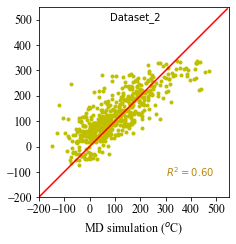

In [80]:
plt.figure(figsize=(3.5,3.5))

ax=plt.subplot(1, 1, 1)
#plt.plot(y, y_pred_train, 'b.') 
plt.plot(df['MD'], Morgan_Frequency_RF, 'y.') 
plt.xlabel("MD simulation ($^o$C)",fontname="Times New Roman", fontsize=12)
#plt.ylabel("Predicted value of Tg (C)",fontname="Times New Roman", fontsize=15)
x0, x1 = min(df['MD']), max(df['MD'])
length = 750
x_start, x_end = -200, 550
plt.xlim([-200, 550])
plt.ylim([-200, 550])
ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), 'r-')
plt.text(300, -118, "$R^2={:.2f}$".format(round(r2_score(df['MD'], Morgan_Frequency_RF),2)),{'color':"darkgoldenrod"})
plt.text(80, 500, "Dataset_2")

### Load Monomer_0 based Monomer_Morgan_Frequency_DNN model 

In [20]:
model = load_model('../Model/Monomer_Morgan_Frequency_DNN.model')

In [68]:
Monomer_Morgan_Frequency_DNN = model.predict((X_dataset_2_Monomer))

In [69]:
Monomer_509_dataset2 = pickle.load(open("../Data/Monomer_509_dataset2.pickle","rb"))

In [70]:
df_monomer = Monomer_509_dataset2.join(df.set_index('SMILES_Monomer_0'), on='Monomer_Smiles')

In [71]:
df_monomer["New_Monomer_Morgan_Frequency_DNN"] = Monomer_Morgan_Frequency_DNN

Text(80, 500, 'Dataset_2')

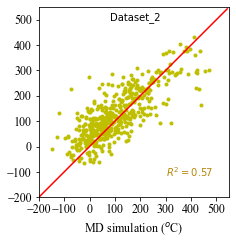

In [72]:
plt.figure(figsize=(3.5,3.5))

ax=plt.subplot(1, 1, 1)
#plt.plot(y, y_pred_train, 'b.') 
plt.plot(df_monomer.dropna()['MD'], df_monomer.dropna()['New_Monomer_Morgan_Frequency_DNN'], 'y.') 
plt.xlabel("MD simulation ($^o$C)",fontname="Times New Roman", fontsize=12)
x0, x1 = min(df['MD']), max(df['MD'])
length = 750
x_start, x_end = -200, 550
plt.xlim([-200, 550])
plt.ylim([-200, 550])
ax.set_xticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), 'r-')
plt.text(300, -118, "$R^2={:.2f}$".format(round(r2_score(df_monomer.dropna()['MD'], df_monomer.dropna()['New_Monomer_Morgan_Frequency_DNN']),2)),{'color':"darkgoldenrod"})
plt.text(80, 500, "Dataset_2")

### Load Polymerized_16 based SmilesExpand_Morgan_Frequency_SVM model 

In [73]:
model = pickle.load(open("../Model/SmilesExpand_Morgan_Frequency_SVM.model","rb"))

In [75]:
SmilesExpand_Morgan_Frequency_SVM = model.predict((X_dataset_2_SmilesExpand))

Text(80, 500, 'Dataset_2')

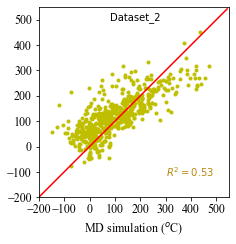

In [76]:
plt.figure(figsize=(3.5,3.5))

ax=plt.subplot(1, 1, 1)
#plt.plot(y, y_pred_train, 'b.') 
plt.plot(df['MD'], SmilesExpand_Morgan_Frequency_SVM, 'y.') 
plt.xlabel("MD simulation ($^o$C)",fontname="Times New Roman", fontsize=12)
#plt.ylabel("Predicted value of Tg (C)",fontname="Times New Roman", fontsize=15)
x0, x1 = min(df['MD']), max(df['MD'])
length = 750
x_start, x_end = -200, 550
plt.xlim([-200, 550])
plt.ylim([-200, 550])
ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), 'r-')
plt.text(300, -118, "$R^2={:.2f}$".format(round(r2_score(df['MD'], SmilesExpand_Morgan_Frequency_SVM),2)),{'color':"darkgoldenrod"})
plt.text(80, 500, "Dataset_2")

### All other models are in the Model folder

In [77]:
### Same procedures as above